In [58]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
import re
import pickle
import os
import string
import tqdm
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from nltk import wordnet
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from tensorflow.keras.preprocessing.text import Tokenizer


In [59]:
data = pd.read_csv('/kaggle/input/bangla-fsa/Bangla financial sentiment.csv',encoding='UTF-8')

data.head(10)
data.shape

(1836, 4)

In [60]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Headline', 'label'], dtype='object')

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  1836 non-null   int64  
 1   Unnamed: 0    1236 non-null   float64
 2   Headline      1836 non-null   object 
 3   label         1836 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 57.5+ KB


In [62]:
print("Total Headline:",len(data),
      "\nTotal Positive Headline:",len(data[data.label==1]),
      "\nTotal Negative Headline:",len(data[data.label==0]))
      

Total Headline: 1836 
Total Positive Headline: 888 
Total Negative Headline: 948


In [63]:
data.describe(include = "all")

,Unnamed: 0.1,Unnamed: 0,Headline,label
count,1836.000000,1236.000000,1836,1836.000000
unique,NaN,NaN,1830,NaN
top,NaN,NaN,সোনার দাম ভরিতে ১১৬৬ টাকা কমল,NaN
freq,NaN,NaN,2,NaN
mean,311.460784,315.809061,NaN,0.483660
std,185.410081,188.989079,NaN,0.499869
min,0.000000,0.000000,NaN,0.000000
25%,152.750000,154.750000,NaN,0.000000
50%,306.000000,310.000000,NaN,0.000000
75%,462.000000,465.250000,NaN,1.000000


In [64]:
data.isna().sum()

Unnamed: 0.1      0
Unnamed: 0      600
Headline          0
label             0
dtype: int64

In [65]:
len(data[data.duplicated()])

0

In [66]:
df = data.drop_duplicates()
print(df.head())
print(df.shape)

   Unnamed: 0.1  Unnamed: 0  \
0             0         0.0   
1             1         1.0   
2             2         2.0   
3             3         3.0   
4             4         4.0   

                                            Headline  label  
0  তারল্যসংকট প্রতিদিনই জরিমানা দিচ্ছে শরিয়াহভিত্...      0  
1  এবার বাংলাদেশের ঋণমান কমানোর কথা জানাল এসঅ্যান...      0  
2      বৈশ্বিক মূল্যস্ফীতি কমবে প্রবৃদ্ধি কমে হবে ৩%      1  
3            সংকটেও রেকর্ড মুনাফা লেনদেনে ফিরল শেয়ার      1  
4             বিমার দাপট সপ্তাহজুড়ে  কারসাজির সন্দেহ      0  
(1836, 4)


<Axes: >

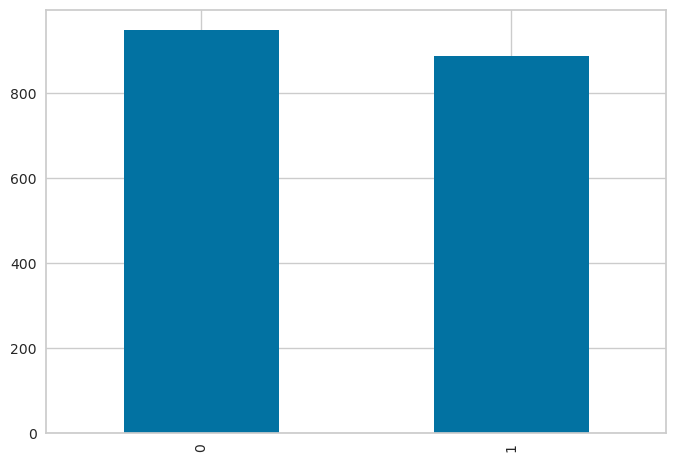

In [67]:
df["label"].value_counts().plot(kind = "bar", color = "b")

In [68]:
# df.to_csv("Bangla financial sentiment.csv")

# DATA CLANING

In [69]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [70]:
df['Headline'] = df.Headline.apply(lambda x: preprocessing(str(x)))

In [71]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Headline,label
0,0,0.0,তারল্যসংকট প্রতিদিনই জরিমানা দিচ্ছে শরিয়াহভিত্...,0
1,1,1.0,এবার বাংলাদেশের ঋণমান কমানোর কথা জানাল এসঅ্যান...,0
2,2,2.0,বৈশ্বিক মূল্যস্ফীতি কমবে প্রবৃদ্ধি কমে হবে,1
3,3,3.0,সংকটেও রেকর্ড মুনাফা লেনদেনে ফিরল শেয়ার,1
4,4,4.0,বিমার দাপট সপ্তাহজুড়ে কারসাজির সন্দেহ,0


# Dataset Summary

In [72]:
def data_summary(dataset):
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.Headline) for word in t.strip().split()]
    class_label= [k for k,v in dataset.label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.label==label].Headline) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.label==label].Headline)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.label==label].Headline))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:20]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(df)


Class Name :  0
Number of Documents:948
Number of Words:5969
Number of Unique Words:2287
Most Frequent Words:

দাম	85
কমেছে	71
টাকা	57
না	51
কোটি	48
ও	44
বাড়ছে	37
হাজার	34
বড়	34
ব্যাংক	33
কমে	33
ডলারের	32
বন্ধ	31
আমদানি	28
লেনদেন	28
ঋণ	27
বেড়েছে	27
রপ্তানি	26
ডলার	26
আয়	26

Class Name :  1
Number of Documents:888
Number of Words:5637
Number of Unique Words:2227
Most Frequent Words:

দাম	59
বেড়েছে	56
কোটি	53
নতুন	49
টাকা	48
হবে	42
বাংলাদেশ	40
ও	36
রপ্তানি	35
হচ্ছে	34
এক	30
লেনদেন	30
বিনিয়োগ	29
হাজার	29
দেশে	27
থেকে	26
পর	26
শুরু	25
ব্যাংক	25
শতাংশ	23
Total Number of Unique Words:3622


In [73]:
df

,Unnamed: 0.1,Unnamed: 0,Headline,label
0,0,0.0,তারল্যসংকট প্রতিদিনই জরিমানা দিচ্ছে শরিয়াহভিত্...,0
1,1,1.0,এবার বাংলাদেশের ঋণমান কমানোর কথা জানাল এসঅ্যান...,0
2,2,2.0,বৈশ্বিক মূল্যস্ফীতি কমবে প্রবৃদ্ধি কমে হবে,1
3,3,3.0,সংকটেও রেকর্ড মুনাফা লেনদেনে ফিরল শেয়ার,1
4,4,4.0,বিমার দাপট সপ্তাহজুড়ে কারসাজির সন্দেহ,0
...,...,...,...,...
1831,609,NaN,নওগাঁয় কমেছে সবজির দাম হতাশায় চাষিরা,0
1832,610,NaN,সরগরম সিরাজগঞ্জের সবজির আড়ত কমেছে দাম,0
1833,611,NaN,সিন্ডিকেট কারসাজিতে অস্থির খাতুনগঞ্জের ভোজ্যতে...,0
1834,612,NaN,ইচ্ছেমতো পণ্যের দাম নিচ্ছেন কারওয়ান বাজারের ব্...,0


# Dataset Summary Visualization

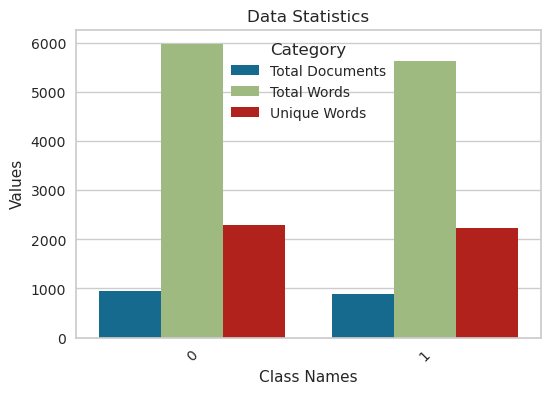

In [74]:

data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df2 = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df2,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);
     

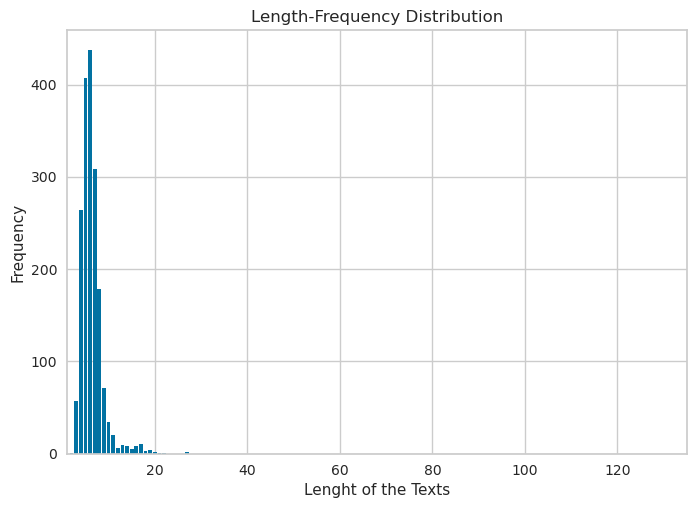

Maximum Length of a Headline: 27
Minimum Length of a Headline: 2
Average Length of a Headline: 6.0


In [75]:

# Calculate the Review of each of the Review
df['length'] = df.Headline.apply(lambda x:len(x.split()))
frequency = dict()
for i in df.length:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Headline: {max(df.length)}")
print(f"Minimum Length of a Headline: {min(df.length)}")
print(f"Average Length of a Headline: {round(np.mean(df.length),0)}")

In [76]:
df.reset_index(drop=True, inplace=True)
df

,Unnamed: 0.1,Unnamed: 0,Headline,label,length
0,0,0.0,তারল্যসংকট প্রতিদিনই জরিমানা দিচ্ছে শরিয়াহভিত্...,0,7
1,1,1.0,এবার বাংলাদেশের ঋণমান কমানোর কথা জানাল এসঅ্যান...,0,7
2,2,2.0,বৈশ্বিক মূল্যস্ফীতি কমবে প্রবৃদ্ধি কমে হবে,1,6
3,3,3.0,সংকটেও রেকর্ড মুনাফা লেনদেনে ফিরল শেয়ার,1,6
4,4,4.0,বিমার দাপট সপ্তাহজুড়ে কারসাজির সন্দেহ,0,5
...,...,...,...,...,...
1831,609,NaN,নওগাঁয় কমেছে সবজির দাম হতাশায় চাষিরা,0,6
1832,610,NaN,সরগরম সিরাজগঞ্জের সবজির আড়ত কমেছে দাম,0,6
1833,611,NaN,সিন্ডিকেট কারসাজিতে অস্থির খাতুনগঞ্জের ভোজ্যতে...,0,7
1834,612,NaN,ইচ্ছেমতো পণ্যের দাম নিচ্ছেন কারওয়ান বাজারের ব্...,0,7


In [77]:
#for iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

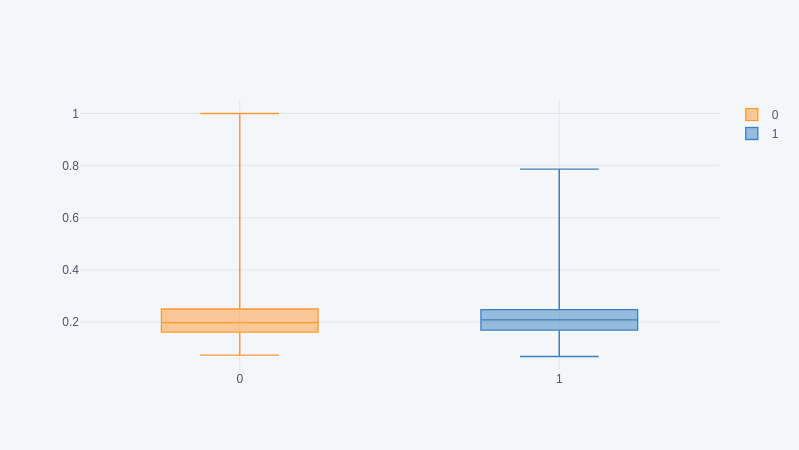

In [78]:
#Number of Charracter
df['nr_of_char'] = df['Headline'].str.len()
df['nr_of_char'] = df['nr_of_char'] / df['nr_of_char'].max()
df[['label', 'nr_of_char']].pivot(columns = 'label', values = 'nr_of_char').iplot(kind = 'box')


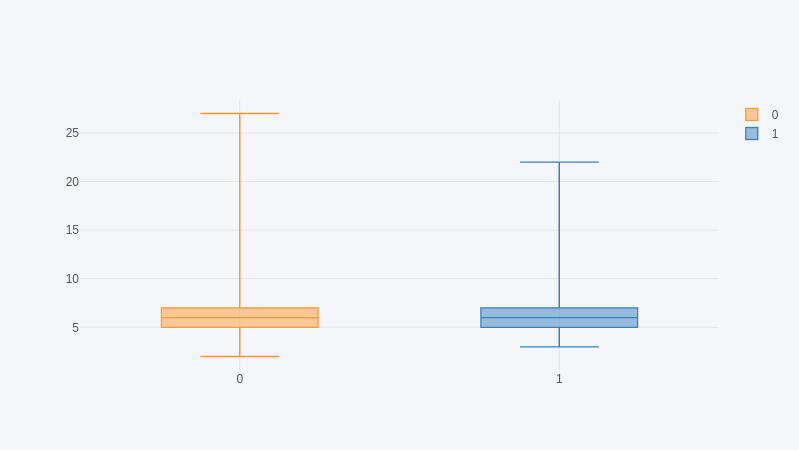

In [79]:
#word count
df['nr_of_words'] = df['Headline'].str.split().str.len()
df['nr_of_words'] = df['nr_of_words'] / df['nr_of_char'].max()
df[['label', 'nr_of_words']].pivot(columns = 'label', values = 'nr_of_words').iplot(kind = 'box')

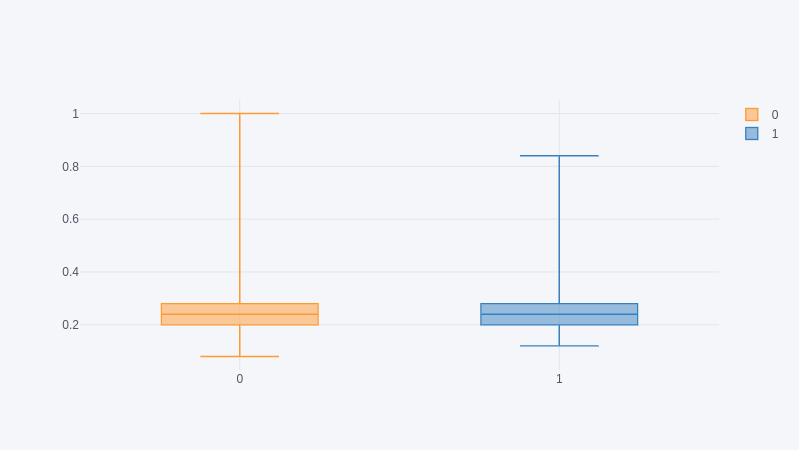

In [80]:
df['nr_of_unique_words'] = df['Headline'].apply(lambda x: len(set(x.split())))
df['nr_of_unique_words'] = df['nr_of_unique_words'] / df['nr_of_unique_words'].max()
df[['label', 'nr_of_unique_words']].pivot(columns = 'label', values = 'nr_of_unique_words').iplot(kind='box')

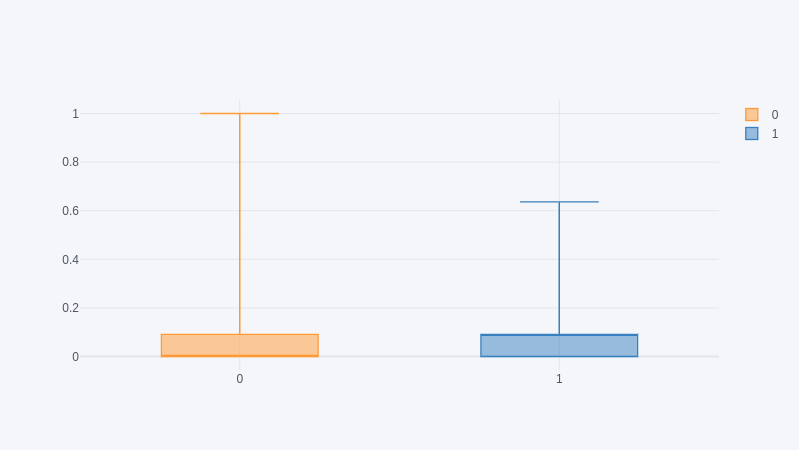

In [81]:
stop_words = set(stopwords.words('bengali'))
df['nr_of_stopwords'] = df['Headline'].str.split().apply(lambda x: len(set(x) & stop_words))
df['nr_of_stopwords'] = df['nr_of_stopwords'] / df['nr_of_stopwords'].max()
df[['label', 'nr_of_stopwords']].pivot(columns = 'label', values = 'nr_of_stopwords').iplot(kind = 'box')

In [82]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Headline,label,length,nr_of_char,nr_of_words,nr_of_unique_words,nr_of_stopwords
0,0,0.0,তারল্যসংকট প্রতিদিনই জরিমানা দিচ্ছে শরিয়াহভিত্...,0,7,0.312500,7.0,0.28,0.000000
1,1,1.0,এবার বাংলাদেশের ঋণমান কমানোর কথা জানাল এসঅ্যান...,0,7,0.260417,7.0,0.28,0.090909
2,2,2.0,বৈশ্বিক মূল্যস্ফীতি কমবে প্রবৃদ্ধি কমে হবে,1,6,0.223958,6.0,0.24,0.090909
3,3,3.0,সংকটেও রেকর্ড মুনাফা লেনদেনে ফিরল শেয়ার,1,6,0.203125,6.0,0.24,0.000000
4,4,4.0,বিমার দাপট সপ্তাহজুড়ে কারসাজির সন্দেহ,0,5,0.197917,5.0,0.20,0.000000


In [83]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Headline', 'label', 'length',
       'nr_of_char', 'nr_of_words', 'nr_of_unique_words', 'nr_of_stopwords'],
      dtype='object')

# Feature correlation matrix

In [84]:
corr_df = df[['Headline', 'label', 'length', 'nr_of_char', 'nr_of_words',
       'nr_of_unique_words', 'nr_of_stopwords']].copy()
corr_df.head()

,Headline,label,length,nr_of_char,nr_of_words,nr_of_unique_words,nr_of_stopwords
0,তারল্যসংকট প্রতিদিনই জরিমানা দিচ্ছে শরিয়াহভিত্...,0,7,0.312500,7.0,0.28,0.000000
1,এবার বাংলাদেশের ঋণমান কমানোর কথা জানাল এসঅ্যান...,0,7,0.260417,7.0,0.28,0.090909
2,বৈশ্বিক মূল্যস্ফীতি কমবে প্রবৃদ্ধি কমে হবে,1,6,0.223958,6.0,0.24,0.090909
3,সংকটেও রেকর্ড মুনাফা লেনদেনে ফিরল শেয়ার,1,6,0.203125,6.0,0.24,0.000000
4,বিমার দাপট সপ্তাহজুড়ে কারসাজির সন্দেহ,0,5,0.197917,5.0,0.20,0.000000


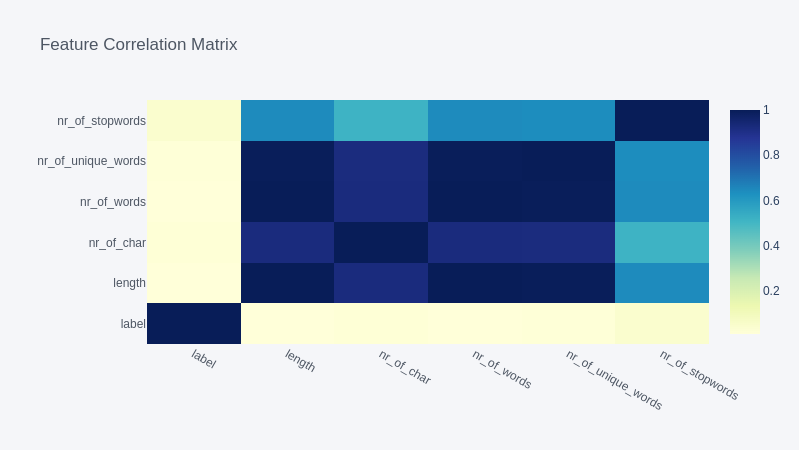

In [85]:
corr_df.corr().iplot(kind='heatmap',colorscale="YlGnBu",title="Feature Correlation Matrix")

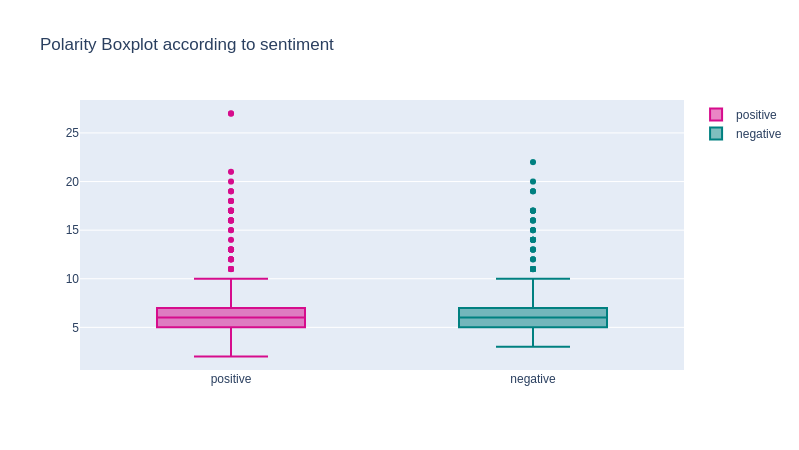

In [86]:
import plotly.express as px
import plotly.graph_objects as go

y0 = df.loc[df['label'] == 0]['length']
y1 = df.loc[df['label'] == 1]['length']

trace0 = go.Box(
    y=y0,
    name = 'positive',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'negative',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title = "Polarity Boxplot according to sentiment"
)

go.Figure(data=data,layout=layout)


# CLusturing
[DBSCAN](https://dev.to/wmisingo/machine-learning-text-clustering-with-dbscan-399n)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfModel = TfidfVectorizer()
print(tfidfModel.fit_transform(df['Headline']))

  (0, 405)	0.3105539486103972
  (0, 954)	0.42100351621654813
  (0, 874)	0.3653317952261409
  (0, 422)	0.372911017002843
  (0, 562)	0.42100351621654813
  (0, 783)	0.20840525362292653
  (0, 283)	0.23535138119490095
  (0, 755)	0.26729499379957244
  (0, 808)	0.32598886543185657
  (1, 467)	0.48528599017041024
  (1, 242)	0.48528599017041024
  (1, 290)	0.4284436373839905
  (1, 298)	0.2027849587686935
  (1, 190)	0.46013284836079354
  (1, 222)	0.3042812636860618
  (2, 953)	0.4677768567608148
  (2, 796)	0.361520381646598
  (2, 302)	0.5473541397466342
  (2, 298)	0.3377803130232693
  (2, 755)	0.4866166168239577
  (3, 580)	0.465647454010864
  (3, 304)	0.3569330339796648
  (3, 283)	0.4740159756002472
  (3, 808)	0.6565669141093066
  (4, 905)	0.4377384887239136
  :	:
  (1830, 352)	0.6357035526740441
  (1830, 882)	0.5314012287149996
  (1830, 77)	0.4673320385243267
  (1830, 304)	0.3083739499479236
  (1831, 564)	0.6265116787562406
  (1831, 919)	0.5552513517984096
  (1831, 950)	0.46547395729497987
  (1831

In [88]:
print(tfidfModel.fit_transform(df['Headline']).todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [89]:
# tfidfModel.vocabulary_

In [90]:
tfidf_df = pd.DataFrame(tfidfModel.fit_transform(df['Headline']).todense())
tfidf_df.columns = sorted(tfidfModel.vocabulary_)
tfidf_df

,অক,অখ,অগ,অঙ,অচ,অচল,অজ,অঞ,অট,অত,...,য়ও,য়ক,য়ত,য়ন,য়নক,য়নয,য়ভ,য়ম,য়মন,য়র
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1833,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
X=tfidf_df
y=df[['label']]

Text(0, 0.5, 'Inertia')

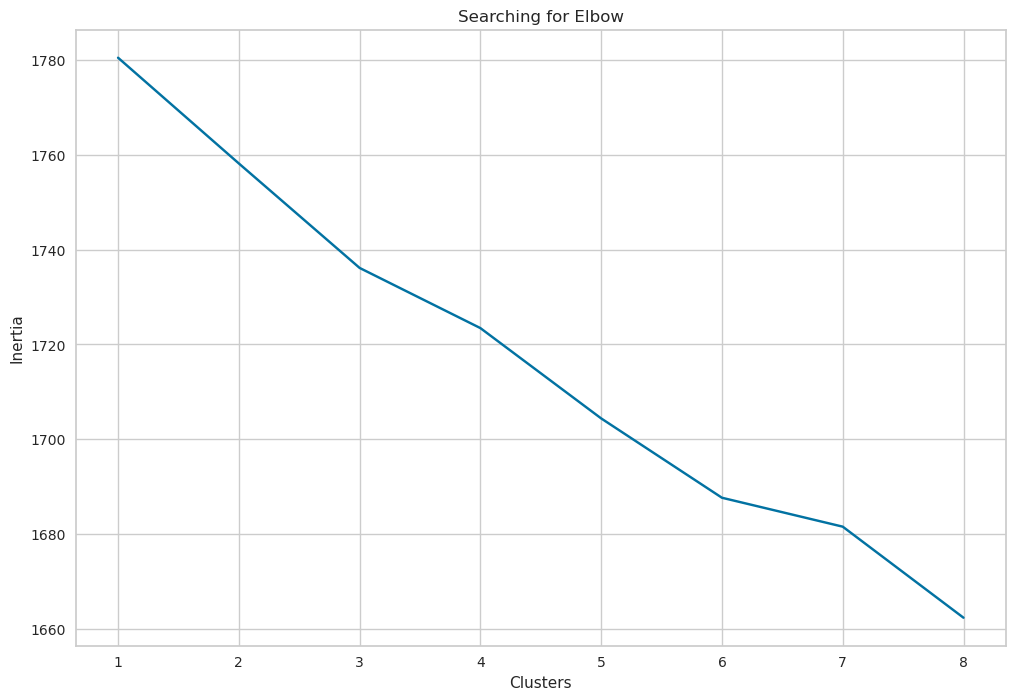

In [92]:
from sklearn.cluster import KMeans
clusters = []

for i in range(1, 9):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 9)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/opt/conda/lib/python3.10/site-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning:

No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.

/opt/conda/lib/python3.10/site-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning:

No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning



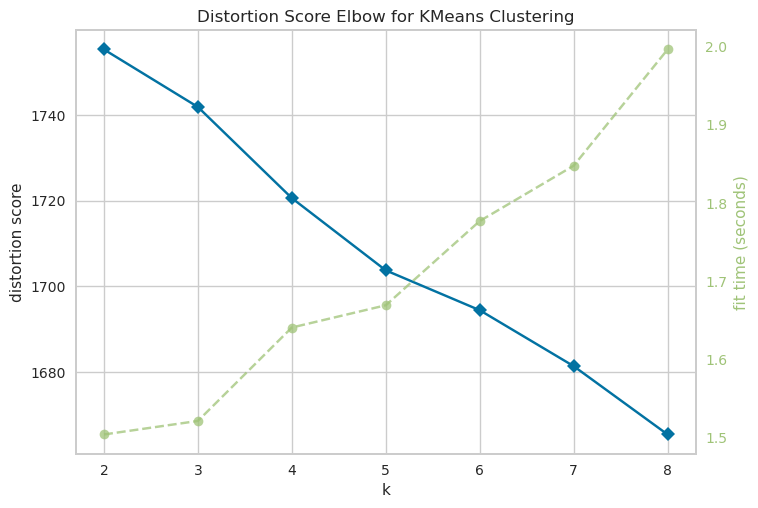

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,9))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [94]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 9):
    silhouette_scores.append( 
        silhouette_score(X, KMeans(n_clusters = n_cluster).fit_predict(X))) 
    
silhouette_scores

[0.011449097639937107,
 0.013880420880273081,
 0.016922238742515344,
 0.01898770101125394,
 0.02306721359059281,
 0.023973723382844238,
 0.028016944531199774]

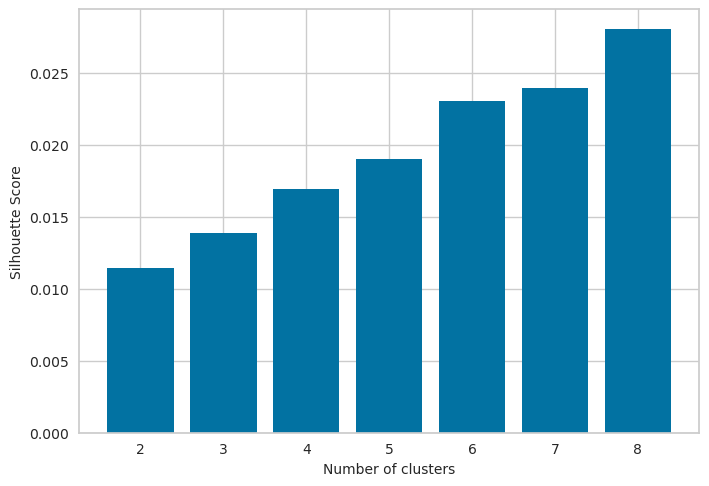

In [95]:
k = [2,3,4,5,6,7,8]
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [96]:
max_value = max(silhouette_scores)
max_index = silhouette_scores.index(max_value)
print(max_index)

6


In [97]:
number_of_cluster=max_index+2
number_of_cluster

8

In [98]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KMeans(n_clusters=number_of_cluster), {
#     'n_clusters': [2,3,4],
    'max_iter': [300,400,500],
    'init': ['random','k-means++'],
    'algorithm': ['auto', 'full','elkan'],
    'tol':[0.0001,0.00001]
}, return_train_score=False)

In [99]:
clf.fit(X)
df2= pd.DataFrame(clf.cv_results_)
df2[['param_max_iter','param_init','param_tol','param_algorithm','mean_test_score']]
# clf.cv_results_

,param_max_iter,param_init,param_tol,param_algorithm,mean_test_score
0,300,random,0.0001,auto,-340.679294
1,300,random,0.00001,auto,-341.382367
2,400,random,0.0001,auto,-340.744509
3,400,random,0.00001,auto,-341.517331
4,500,random,0.0001,auto,-341.214890
5,500,random,0.00001,auto,-341.022710
6,300,k-means++,0.0001,auto,-340.969278
7,300,k-means++,0.00001,auto,-339.203291
8,400,k-means++,0.0001,auto,-340.631682
9,400,k-means++,0.00001,auto,-340.879432


In [100]:
clf.best_params_

{'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 500, 'tol': 1e-05}

In [101]:
kmeans = KMeans(n_clusters=number_of_cluster,init=clf.best_params_['init'], max_iter=clf.best_params_['max_iter'], tol=clf.best_params_['tol'],algorithm=clf.best_params_['algorithm'])

In [102]:
kmeans.fit(X)
kmeans.labels_

array([3, 4, 0, ..., 3, 3, 3], dtype=int32)

In [103]:
y_kmeans =  kmeans.fit_predict(X)
df['K_Means_Cluster']  = y_kmeans

In [104]:
df.groupby(['K_Means_Cluster'])['Headline'].count()

K_Means_Cluster
0      72
1      77
2     155
3      71
4    1081
5      83
6     169
7     128
Name: Headline, dtype: int64

In [105]:
print("Top terms per cluster:")

order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = tfidfModel.get_feature_names_out()
for i in range(number_of_cluster):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind], end='')
        print()

Top terms per cluster:
Cluster 0: বছর
 সর
 এক
 পর
 মধ
 বন
 যস
 রব
 গত
 আয়
Cluster 1: নদ
 এসইত
 সর
 চক
 কম
 রব
 এক
 বন
 গত
 পর
Cluster 2: রব
 আয়
 কমল
 ডল
 ভর
 কমব
 কম
 রপ
 শত
 যস
Cluster 3: ঋণ
 দন
 ড়ছ
 কম
 উদ
 রণ
 বড়
 বব
 সরক
 নত
Cluster 4: রত
 ডল
 পর
 রপ
 যবস
 অর
 তর
 বন
 কট
 থন
Cluster 5: নত
 উন
 কর
 আম
 তর
 পদ
 রত
 কম
 আশ
 হক
Cluster 6: কর
 রত
 মস
 অর
 রভ
 তর
 তন
 পর
 থন
 ড়ছ
Cluster 7: কম
 শত
 রপ
 আমদ
 ডল
 কট
 য়ন
 দন
 আয়
 রব


In [106]:
# #word cloud
# def word_cloud(pred_df,label):
#     wc = ' '.join([text for text in pred_df['Headline'][pred_df['K_Means_Cluster'] == label]])
#     wordcloud = WordCloud(width=800, height=500,
#     random_state=21, max_font_size=110).generate(wc)
#     fig7 = plt.figure(figsize=(10, 7))
#     plt.imshow(wordcloud, interpolation="bilinear")
#     plt.axis('off')

In [107]:
# for i in range (0,number_of_cluster):
#     word_cloud(df,i)

In [108]:
from sklearn import metrics
kmeans_ch = metrics.calinski_harabasz_score(X, y_kmeans )
print(kmeans_ch)
kmeans_db = metrics.davies_bouldin_score(X, y_kmeans )
print(kmeans_db)
kmeans_silhouette = metrics.silhouette_score(X, y_kmeans , metric='euclidean')
print(kmeans_silhouette)

17.822449406473634
4.655946371891937
0.026813776256689285


# ScatterPlot
[Text Scatter Plot](http://https://stackoverflow.com/questions/57626286/how-to-plot-text-clusters)

[Visualization](https://medium.com/analytics-vidhya/bengali-text-visualization-using-word2vec-211e2ed9fa30)

In [117]:
x=df.Headline
y=df.label

In [116]:
def calc_gram_tfidf(Headline,gram):
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
#     X = tfidf.fit_transform(Headline)
    X=pd.DataFrame(tfidf.fit_transform(Headline).todense())
    
    return tfidf,X

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

print(f'Gram Name: Unigram')
fidf,feature = calc_gram_tfidf(df.Headline,(1,1))
labels = df.label
print(feature.shape, labels.shape)

Gram Name: Unigram
(1836, 3622) (1836,)


Text(0, 0.5, 'Second Component')

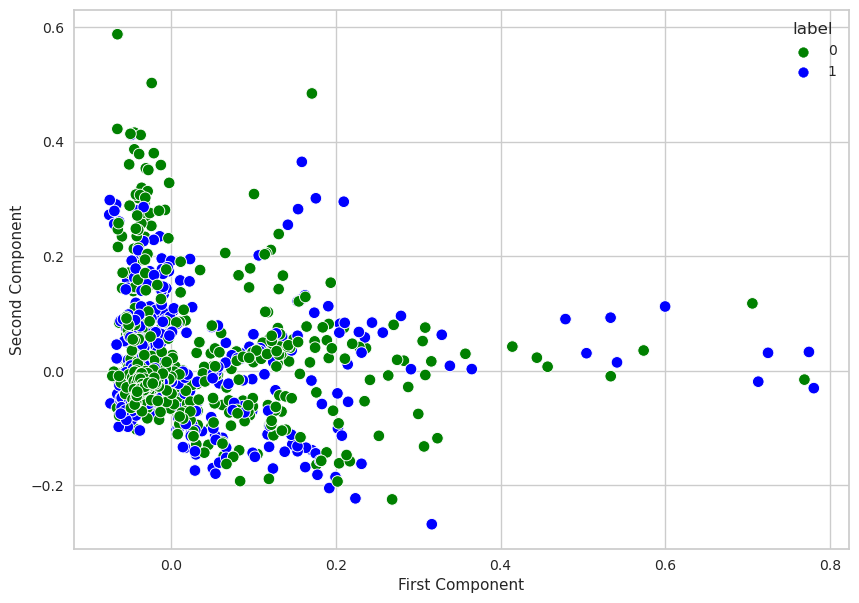

In [123]:
pca_2=PCA(n_components=2, random_state=2020)
pca_2.fit(feature)
X_pca_2 = pca_2.transform(feature)
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca_2[:,0],y=X_pca_2[:,1],s=70,hue=labels,palette=['green','blue'])
plt.xlabel('First Component')
plt.ylabel('Second Component')

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.decomposition import PCA

# tf_idf = TfidfVectorizer(analyzer = 'word',stop_words=stopwords.words('bengali'),ngram_range=(1, 1))  
# vectors = tf_idf .fit_transform(x)

# pca = PCA(n_components=2)
# scatter_plot_points = pca.fit_transform(vectors.toarray())

# colors = ["r", "b" ]

# x_axis = [o[0] for o in scatter_plot_points]
# y_axis = [o[1] for o in scatter_plot_points]
# fig, ax = plt.subplots(figsize=(12,8))

# # prop = fm.FontProperties(fname='kalpurush.ttf')

# ax.scatter(x_axis, y_axis, c=[colors[d] for d in df.label])
# for i in enumerate(x):
#     ax.annotate((x_axis[i], y_axis[i]))


# for i, txt in enumerate(x):
#     ax.annotate(txt, (x_axis[i], y_axis[i]))